<a href="https://colab.research.google.com/github/Shahi77/DeepLearning_Assignments/blob/main/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cpu

Training LeNet on MNIST with Sigmoid activation
Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 503kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.65MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.95MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/15], Loss: 0.8428, Accuracy: 74.36%
Epoch [2/15], Loss: 0.1457, Accuracy: 95.87%
Epoch [3/15], Loss: 0.0983, Accuracy: 97.04%
Epoch [4/15], Loss: 0.0792, Accuracy: 97.59%
Epoch [5/15], Loss: 0.0671, Accuracy: 97.97%
Epoch [6/15], Loss: 0.0586, Accuracy: 98.23%
Epoch [7/15], Loss: 0.0526, Accuracy: 98.42%
Epoch [8/15], Loss: 0.0468, Accuracy: 98.55%
Epoch [9/15], Loss: 0.0432, Accuracy: 98.67%
Epoch [10/15], Loss: 0.0385, Accuracy: 98.82%
Epoch [11/15], Loss: 0.0364, Accuracy: 98.84%
Epoch [12/15], Loss: 0.0328, Accuracy: 99.01%
Epoch [13/15], Loss: 0.0301, Accuracy: 99.09%
Epoch [14/15], Loss: 0.0279, Accuracy: 99.14%
Epoch [15/15], Loss: 0.0253, Accuracy: 99.17%

Training LeNet on MNIST with Bipolar Sigmoid activation
Epoch [1/15], Loss: 0.3429, Accuracy: 89.60%
Epoch [2/15], Loss: 0.0893, Accuracy: 97.24%
Epoch [3/15], Loss: 0.0608, Accuracy: 98.10%
Epoch [4/15], Loss: 0.0481, Accuracy: 98.56%
Epoch [

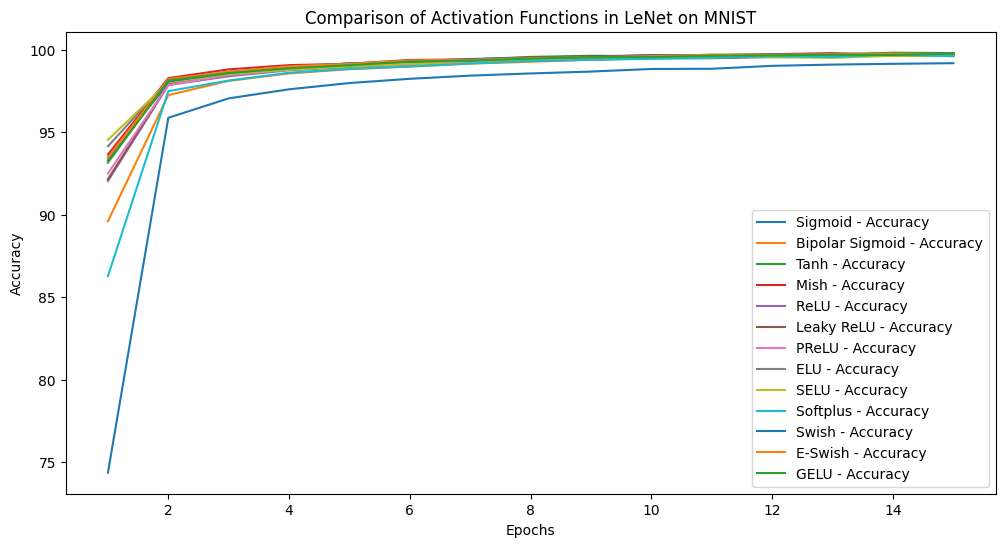


Training ResNet on MNIST with Sigmoid activation


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/15], Loss: 0.1357, Accuracy: 95.95%
Epoch [2/15], Loss: 0.0625, Accuracy: 98.16%
Epoch [3/15], Loss: 0.0447, Accuracy: 98.76%
Epoch [4/15], Loss: 0.0372, Accuracy: 98.89%
Epoch [5/15], Loss: 0.0328, Accuracy: 99.04%
Epoch [6/15], Loss: 0.0311, Accuracy: 99.06%
Epoch [7/15], Loss: 0.0276, Accuracy: 99.18%
Epoch [8/15], Loss: 0.0223, Accuracy: 99.35%
Epoch [9/15], Loss: 0.0209, Accuracy: 99.36%
Epoch [10/15], Loss: 0.0184, Accuracy: 99.46%
Epoch [11/15], Loss: 0.0155, Accuracy: 99.55%
Epoch [12/15], Loss: 0.0168, Accuracy: 99.52%
Epoch [13/15], Loss: 0.0119, Accuracy: 99.65%
Epoch [14/15], Loss: 0.0140, Accuracy: 99.57%
Epoch [15/15], Loss: 0.0160, Accuracy: 99.56%

Training ResNet on MNIST with Bipolar Sigmoid activation
Epoch [1/15], Loss: 0.1330, Accuracy: 95.95%
Epoch [2/15], Loss: 0.0599, Accuracy: 98.20%
Epoch [3/15], Loss: 0.0477, Accuracy: 98.61%
Epoch [4/15], Loss: 0.0371, Accuracy: 98.88%
Epoch [5/15], Loss: 0.0336, Accuracy: 99.02%
Epoch [6/15], Loss: 0.0289, Accuracy

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


class BipolarSigmoid(nn.Module):
    def forward(self, x):
        return 2 / (1 + torch.exp(-x)) - 1

activations = {
    "Sigmoid": nn.Sigmoid(),
    "Bipolar Sigmoid": BipolarSigmoid(),
    "Tanh": nn.Tanh(),
    "Mish": nn.Mish(),
    "ReLU": nn.ReLU(),
    "Leaky ReLU": nn.LeakyReLU(0.01),
    "PReLU": nn.PReLU(),
    "ELU": nn.ELU(),
    "SELU": nn.SELU(),
    "Softplus": nn.Softplus(),
    "Swish": lambda x: x * torch.sigmoid(x),
    "E-Swish": lambda x: 1.25 * x * torch.sigmoid(x),
    "GELU": nn.GELU()
}


def load_data(dataset_name, batch_size=64):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    if dataset_name == "MNIST":
        dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "Fashion-MNIST":
        dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-10":
        dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-100":
        dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
    else:
        raise ValueError("Invalid dataset name!")
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)


def get_model(architecture, num_classes=10, activation_fn="ReLU"):
    activation = activations[activation_fn]

    if architecture == "LeNet":
        model = LeNet(num_classes=num_classes, activation_fn=activation_fn)
    elif architecture == "ResNet":
        model = models.resnet18(pretrained=False)
        model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)  # Change input channel to 1
        model.fc = nn.Linear(model.fc.in_features, num_classes)  # Adjust output layer
        model = model.to(device)
    elif architecture == "MobileNet":
        model = models.mobilenet_v2(pretrained=False)
        model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)  # Change input channel to 1
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)  # Adjust output layer
        model = model.to(device)
    else:
        raise ValueError("Invalid architecture!")

    return model

# Define LeNet Model with Correct Flattening
class LeNet(nn.Module):
    def __init__(self, num_classes=10, activation_fn="ReLU"):
        super(LeNet, self).__init__()
        self.activation = activations[activation_fn]
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  # 1 input channel (grayscale)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)

        # Calculate the size after convolution and pooling
        self._to_linear = None
        self.convs_output_size(28, 28)  # 28x28 is the input size for MNIST/Fashion-MNIST

        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def convs_output_size(self, h, w):
        # Forward pass through convolutional layers to calculate output size
        x = torch.randn(1, 1, h, w)  # Dummy input with 1 channel (grayscale)
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        # Flatten and calculate the total number of features
        self._to_linear = x.numel()

    def forward(self, x):
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the output of convolutional layers
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Training Function with Performance Tracking
def train_model(model, train_loader, epochs, learning_rate=0.001):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    accuracies = []

    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0
        epoch_loss = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        losses.append(epoch_loss / len(train_loader))
        accuracies.append(100 * correct / total)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

    return losses, accuracies

# Experiment with Architectures
def experiment(architecture, dataset_name, activation_fn, num_classes=10, batch_size=64, epochs=15):
    print(f"\nTraining {architecture} on {dataset_name} with {activation_fn} activation")
    train_loader = load_data(dataset_name, batch_size)

    model = get_model(architecture, num_classes=num_classes, activation_fn=activation_fn)
    losses, accuracies = train_model(model, train_loader, epochs)

    return losses, accuracies

# Plot the results
def plot_results(results, architecture, dataset_name):
    plt.figure(figsize=(12, 6))
    for activation_fn, (losses, accuracies) in results.items():
        plt.plot(range(1, len(losses)+1), accuracies, label=f"{activation_fn} - Accuracy")
    plt.title(f"Comparison of Activation Functions in {architecture} on {dataset_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Run Experiments and Plot Results
architectures = ["LeNet", "ResNet", "MobileNet"]
datasets_list = ["MNIST"]
activations_list = list(activations.keys())  # Use first 3 for brevity, expand as needed

for dataset_name in datasets_list:
    for architecture in architectures:
        results = {}
        for activation_fn in activations_list:
            losses, accuracies = experiment(architecture, dataset_name, activation_fn)
            results[activation_fn] = (losses, accuracies)
        plot_results(results, architecture, dataset_name)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define Activation Functions
class BipolarSigmoid(nn.Module):
    def forward(self, x):
        return 2 / (1 + torch.exp(-x)) - 1

activations = {
    "Sigmoid": nn.Sigmoid(),
    "Bipolar Sigmoid": BipolarSigmoid(),
    "Tanh": nn.Tanh(),
    "Mish": nn.Mish(),
    "ReLU": nn.ReLU(),
    "Leaky ReLU": nn.LeakyReLU(0.01),
    "PReLU": nn.PReLU(),
    "ELU": nn.ELU(),
    "SELU": nn.SELU(),
    "Softplus": nn.Softplus(),
    "Swish": lambda x: x * torch.sigmoid(x),
    "E-Swish": lambda x: 1.25 * x * torch.sigmoid(x),
    "GELU": nn.GELU()
}

# Load Dataset (Fixed for AlexNet)
def load_data(dataset_name, batch_size=64):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to 224x224 for AlexNet
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    if dataset_name == "MNIST":
        dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "Fashion-MNIST":
        dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    else:
        raise ValueError("Invalid dataset name!")

    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define Model Architectures
def get_model(architecture, num_classes=10, activation_fn="ReLU"):
    activation = activations[activation_fn]

    if architecture == "AlexNet":
        model = models.alexnet(pretrained=False)
        model.features[0] = nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))  # Adjust for grayscale input
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)  # Adjust output layer
        model = model.to(device)
    else:
        raise ValueError("Invalid architecture!")

    return model

# Training Function with Performance Tracking
def train_model(model, train_loader, epochs, learning_rate=0.001):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    accuracies = []

    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0
        epoch_loss = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        losses.append(epoch_loss / len(train_loader))
        accuracies.append(100 * correct / total)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

    return losses, accuracies

# Experiment with Architectures
def experiment(architecture, dataset_name, activation_fn, num_classes=10, batch_size=64, epochs=5):
    print(f"\nTraining {architecture} on {dataset_name} with {activation_fn} activation")
    train_loader = load_data(dataset_name, batch_size)

    model = get_model(architecture, num_classes=num_classes, activation_fn=activation_fn)
    losses, accuracies = train_model(model, train_loader, epochs)

    return losses, accuracies

# Plot the results
def plot_results(results, architecture, dataset_name):
    plt.figure(figsize=(12, 6))
    for activation_fn, (losses, accuracies) in results.items():
        plt.plot(range(1, len(losses)+1), accuracies, label=f"{activation_fn} - Accuracy")
    plt.title(f"Comparison of Activation Functions in {architecture} on {dataset_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Run Experiments and Plot Results
architectures = ["AlexNet"]
datasets_list = ["MNIST"]
activations_list = list(activations.keys())  # Use all activation functions

for dataset_name in datasets_list:
    for architecture in architectures:
        results = {}
        for activation_fn in activations_list:
            losses, accuracies = experiment(architecture, dataset_name, activation_fn)
            results[activation_fn] = (losses, accuracies)
        plot_results(results, architecture, dataset_name)

Using device: cpu

Training AlexNet on MNIST with Sigmoid activation
Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.28MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 153kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.30MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.18MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define Activation Functions
class BipolarSigmoid(nn.Module):
    def forward(self, x):
        return 2 / (1 + torch.exp(-x)) - 1

activations = {
    "Sigmoid": nn.Sigmoid(),
    "Bipolar Sigmoid": BipolarSigmoid(),
    "Tanh": nn.Tanh(),
    "Mish": nn.Mish(),
    "ReLU": nn.ReLU(),
    "Leaky ReLU": nn.LeakyReLU(0.01),
    "PReLU": nn.PReLU(),
    "ELU": nn.ELU(),
    "SELU": nn.SELU(),
    "Softplus": nn.Softplus(),
    "Swish": lambda x: x * torch.sigmoid(x),
    "E-Swish": lambda x: 1.25 * x * torch.sigmoid(x),
    "GELU": nn.GELU()
}

# Load Dataset
def load_data(dataset_name, batch_size=64):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    if dataset_name == "MNIST":
        dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "Fashion-MNIST":
        dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-10":
        dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-100":
        dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
    else:
        raise ValueError("Invalid dataset name!")
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define Model Architectures
def get_model(architecture, num_classes=10, activation_fn="ReLU"):
    activation = activations[activation_fn]

    if architecture == "LeNet":
        model = LeNet(num_classes=num_classes, activation_fn=activation_fn)
    elif architecture == "ResNet":
        model = models.resnet18(pretrained=False)
        model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)  # Change input channel to 1
        model.fc = nn.Linear(model.fc.in_features, num_classes)  # Adjust output layer
        model = model.to(device)
    elif architecture == "MobileNet":
        model = models.mobilenet_v2(pretrained=False)
        model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)  # Change input channel to 1
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)  # Adjust output layer
        model = model.to(device)
    elif architecture == "AlexNet":
        model = models.alexnet(pretrained=False)
        model.features[0] = nn.Conv2d(1, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))  # Change input channel to 1
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)  # Adjust output layer
        model = model.to(device)
    else:
        raise ValueError("Invalid architecture!")

    return model

# Define LeNet Model with Correct Flattening
class LeNet(nn.Module):
    def __init__(self, num_classes=10, activation_fn="ReLU"):
        super(LeNet, self).__init__()
        self.activation = activations[activation_fn]
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  # 1 input channel (grayscale)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)

        # Calculate the size after convolution and pooling
        self._to_linear = None
        self.convs_output_size(28, 28)  # 28x28 is the input size for MNIST/Fashion-MNIST

        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def convs_output_size(self, h, w):
        # Forward pass through convolutional layers to calculate output size
        x = torch.randn(1, 1, h, w)  # Dummy input with 1 channel (grayscale)
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        # Flatten and calculate the total number of features
        self._to_linear = x.numel()

    def forward(self, x):
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the output of convolutional layers
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Training Function with Performance Tracking
def train_model(model, train_loader, epochs, learning_rate=0.001):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    accuracies = []

    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0
        epoch_loss = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        losses.append(epoch_loss / len(train_loader))
        accuracies.append(100 * correct / total)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

    return losses, accuracies

# Experiment with Architectures
def experiment(architecture, dataset_name, activation_fn, num_classes=10, batch_size=64, epochs=15):
    print(f"\nTraining {architecture} on {dataset_name} with {activation_fn} activation")
    train_loader = load_data(dataset_name, batch_size)

    model = get_model(architecture, num_classes=num_classes, activation_fn=activation_fn)
    losses, accuracies = train_model(model, train_loader, epochs)

    return losses, accuracies

# Plot the results
def plot_results(results, architecture, dataset_name):
    plt.figure(figsize=(12, 6))
    for activation_fn, (losses, accuracies) in results.items():
        plt.plot(range(1, len(losses)+1), accuracies, label=f"{activation_fn} - Accuracy")
    plt.title(f"Comparison of Activation Functions in {architecture} on {dataset_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Run Experiments and Plot Results
architectures = ["LeNet"]
datasets_list = ["Fashion-MNIST"]
activations_list = list(activations.keys())  # Use first 3 for brevity, expand as needed

for dataset_name in datasets_list:
    for architecture in architectures:
        results = {}
        for activation_fn in activations_list:
            losses, accuracies = experiment(architecture, dataset_name, activation_fn)
            results[activation_fn] = (losses, accuracies)
        plot_results(results, architecture, dataset_name)